In [1]:
import os
os.chdir("..")

In [2]:
from models.network import UNet_Pretrained
from tutils.mn.train.models.cam_model import ShowGradCam
import cv2
from torchvision import transforms
import torch
import numpy as np
from einops import rearrange


In [16]:
lms = [[165, 158],
 [291, 165],
 [256, 204],
 [118, 192],
 [271, 262],
 [270, 328],
 [263, 353],
 [245, 361],
 [256, 361],
 [137, 290],
 [289, 299],
 [287, 298],
 [314, 280],
 [311, 322],
 [299, 257],
 [280, 361],
 [186, 241],
 [278, 249],
 [131, 213]]

lm_id = 2

def comp_class_vec(output, index=None):
    index = torch.zeros_like(output)
    index[:, lm_id, lms[lm_id][1], lms[lm_id][0]] = 1
    index.requires_grad = True
    class_vec = torch.sum(index * output)  # one_hot = 11.8605

    return class_vec

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0], [1]),
])

im_path = "./test/001.bmp"
img = cv2.imread(im_path)
img = cv2.resize(img, (384,384))
img_input = preprocess(img)
print(img_input.shape)
img_input = img_input.unsqueeze(0).cuda()
net = UNet_Pretrained(3, 19, regression=False)
net.load_state_dict(torch.load('/home1/quanquan/code/landmark/code/runs/finetune/heatmap/pos_ip/ckpt_v/model_best.pth'))
net.cuda()
gradCam = ShowGradCam(net.up4)

output = net(img_input)
net.zero_grad()
class_loss = comp_class_vec(output)
class_loss.backward()
cam_info = gradCam.show_on_img(img)


torch.Size([3, 384, 384])
Load MyVgg
save gradcam result in grad_feature.jpg


/home1/quanquan/code/landmark/code/tproj/models/network.py:185: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
/home1/quanquan/code/landmark/code/tproj/models/network.py:186: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  diffY // 2, diffY - diffY // 2])
/home1/quanquan/miniconda3/envs/py3

(192, 192)
(384, 384)


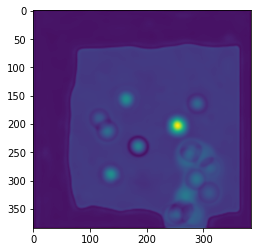

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# cam_info = gradCam.show_on_img(img)
cam = cam_info['cam']
print(cam.shape)
cam = cv2.resize(cam, (384,384))
# im = plt.imread("./grad_feature.jpg")
print(cam.shape)
plt.imshow(cam)
plt.show()

In [66]:
import cv2
im = cv2.imread("./grad_feature.jpg")
print(im.shape)
im = im.copy()
# im[158,165,:] = 255
for lmi in lms:
    im[lmi[1], lmi[0], :] = 255
cv2.imwrite("./grad_feature2.jpg", im)

(384, 384, 3)


True